<a href="https://www.kaggle.com/code/viniciusnalasantos/titanicalgoritm?scriptVersionId=116886628" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  Machine Learning Model to Predict Survival in Titanic

<img src='https://cdn-images-1.medium.com/max/800/0*88vxNBEneFur5knf' alt="Picture" width="600" height="400" style="display: block; margin: 0 auto">
<br>
  Kaggle is an online community platform for data scientists and machine learning enthusiasts. Kaggle allows users to publish datasets, use GPU-integrated notebooks, and compete with other data scientists to solve data science challenges. Initially, this online platform aims to help professionals and learners reach their goals in their data science journey with the powerful tools and resources it provides. Today (2023), there are over 10 million registered users on Kaggle.
  
  All users can dispute with each other to see who builds the more precise machine learning model in the competition. In this article, we will construct one for "Titanic - Machine Learning From Disaster" competition. The objective is very simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. I chose this contest because it is well-known as the "Hello World!" of data science area, so there wasn't a better option to do an article showing the machine learning basics.

### Table of Contents
  
[Part One](#part_one)
* [Introduction](#introduction)
* [Understand the Problem](#understand_problem)
* [Obtain Data](#obtain_data)
* [Exploratory Data Analysis](#exploratory_data_analysis)
    - [Data Dictionary](#data_dictionary)
    - [Overview](#overview)
    - [Percentage of Missing Values](#percentage_missing_values)
    - [Statistic Distribution](#statistic_distribution)
    - [Which groups of people have more chance to survive?](#question)
* [Conclusion](#conclusion)

[Part Two](#part_two)

<a id="part_one"></a>
<h2><b> Part One </b></h2>

---

<a id="introduction"></a>
## Introduction
   Every project in data science area requires - before importing the dataset and starting coding - follow a few steps:
   
- Understand the problem
- Obtain data
- Explore the data
- Prepare the dataset
- Modeling
- Evaluate

When you plan the route that you will take, doing a flowchart or a checklist of the sequence of tasks that needs to be done, the way becomes easier to surpass.
  
#### Code from the article: [Machine Learning](https://nodejs.org/)
   
----

<a id="understand_problem"></a>
## Understand the problem
  Although the variable luck played an important role in the survival of some passengers, there were people more prone to survive than others. And this is our first task: understand why someones have more chance to survive than others. Then we build a Machine Learning Model to predict if people survived or not, based on the data given by Kaggle.

  The complete description of the competition is available on Kaggle website: https://www.kaggle.com/c/titanic

###  Now, let's have fun!

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id="obtain_data"></a>
## Obtain data

In [5]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

All the necessary data can be accessed on the [competition site](https://www.kaggle.com/competitions/titanic), it has been split into two groups:

Training set (train.csv) <br>
 - should be used to build the machine-learning model
 - provide which passenger survived or not

Test set (test.csv) <br>
 - should be used to see how well your model performs on unseen data
 - do not provide if the passenger survived or not

To download the files it's necessary to be registered on Kaggle.

<a id="exploratory_data_analysis"></a>
## Exploratory Data Analysis
  Undoubtedly, this is the most important part of the project, here we will spend 70% - 80% of our time. The quality of our analysis is directly related to the performance of our model.

  In this step, the objective is to <b>identify variables that inform most about the target variable</b>. A good way to do this is by discovering the correlation between the informative variables and the target variable.

  First, let's start looking at all the variables and briefly think about how it is related to the problem:  

<a id="data_dictionary"></a>
### Data Dictionary
- Passengerid: Each passenger has a unique id number, so it does not affect anything in our problem.

- Survival: Informs 1 when the passenger survived and 0 when died (target variable).

- Pclass: Informs the class of the passenger (1 = 1st, 2 = 2nd, 3 = 3rd). 

- Names: As Passengerid, it does not have a relation with Survival, once is a unique value for each one.

- Sex: Informs if the person is a male or female.

- Age: Tells the age of each passenger.

- SibSp: Total of spouses and siblings aboard the ship.

- Parch: Total of parents and children aboard the ship.

- Ticket: The number of the ticket, each passenger has a unique value.

- Fare: Price of the passage.

- Cabin: The number of the cabin of each passenger.

- Embarked: From what port each person embarked (C = Cherbourg, Q = Queenstown, S = Southampton). 

<a id="overview"></a>
### Overview
Now, it's time to get our hands on the code, let's begin looking at the characteristics of the data set:

In [ ]:
# How many lines and columns
print(f'Lines: {train.shape[0]}, Columns: {train.shape[1]}')

In [ ]:
# See the first 5 lines
display(train.head())

# Identify the type of each variable
print(train.dtypes)

<a id="percentage_missing_values"></a>
### Percentage of missing values

In [ ]:
# See the percentage of missing values
(train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Cabin comes with more than 77% of missing values, is the variable with the highest percentage of missing values in the dataset, followed by Age with 19% of missing values.

<a id="statistic_distribution"></a>
### Statistic Distribution

In [ ]:
# Statistic distribution
train.describe()

Using the method .describe() we can see the measures of central tendency and some information about the statistical distribution of the dataset.

In [ ]:
# Plot histograms
train.hist(figsize=(10, 8))
plt.show()

Plotting histograms is a better way to see the statistical distribution of the dataset. It is very useful because we can get some pieces of information with just a quick view, as we can see above:

- The majority of people died
- There are fewer people in the 2nd class than in the 1st class
- The statistical distribution of the age of the people aboard the ship, which most are 20 years old

<a id="question"></a>
### Which groups of people have more chance to survive?
  Now we can start identifying correlations between the variables. To do this, let's plot some graphs comparing the survivors with sex, class of the passenger, and place embarked:

In [ ]:
# Plot graph of Survived vs Sex, Pclass and Embarked
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=ax1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=ax2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=ax3)

plt.show()

 Look how interesting plot a graph can be; with it, the following information can be extracted:
- Woman has more chance to survive than men
- A highest class means a highest chance to survive
- More survivors: Cherbourg(C) > Queenstown(Q) > Southampton(S)
  
Look how understanding a graph can be very insightful, isn't it wonderful? The process of reading a graph and see what this graph is showing is an essential skill if you aim to become a data scientist. This skill can be improved by studying data analysis.

Let's see another example:

In [ ]:
# See the influence of age on the probability of surviving
age_survived = sns.FacetGrid(train, col='Survived', height=5)
age_survived.map(sns.histplot, 'Age', kde=True)

Analyzing the age distribution of the survivors, we can see very discretely that there is a peak in the right graph, between 0 and 5 years. Although the charts are very similar, a more attentive eye can see that kids have more chance to survive: "Ladies and children first!".

A very interesting type of graph that is worth mentioning is the Scatter  Matriz of Pandas:

In [ ]:
# Plotting Age vs Pclass
columns = ['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15,10));

  The advantage of this kind of graph is that it brings useful information. Exhibiting the histogram of each variable we can see how is the distribution of that variable, and the scatter graph of all variables shows the relationship between them. 
  
  After analyzing it, we can notice that the older ones were concentrated in the 1° class, while the younger ones were concentrated in the 3° class. To see it was not clear, it is a very subtle distinction that requires a more acute eye.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('Distribution: Age X Class', fontsize=15, y=1)
axes[0].set_title('Age in each Class', fontsize=12)
axes[1].set_title('Age in each Class grouped by Survived', fontsize=12)

sns.boxplot(ax=axes[0], data=train, x='Age', y='Pclass', orient='h', width=0.65)
sns.boxplot(ax=axes[1], data=train, x='Age', y='Pclass', hue='Survived', orient='h', width=0.65)

Here on the left graph, it's better to see this distinction: in the 3º and 2º classes a person of 60 years is considered an outlier, whereas in the 1º class doesn't. On the right graph we can see the same graph, but grouped by Survived (0=died, 1=alive), and we can see that in all the classes, the older ones died while the younger ones stayed alive, which supports what was mentioned above: younger people are more prone to survive.

Finally, let's look at the heatmap of the variables to see the correlation between them. 

In [ ]:
# Plot a heatmap to compare the variables
sns.heatmap(data=train.corr(), annot=True, cmap='coolwarm', vmax=1.0, linewidths=1, fmt='.2f')
plt.show()

Correlation can be described as how much a variable influence another variable, this value can be calculated and varies between -1 and 1. -1 is a perfect negative correlation, which means that one variable decrease as the other increase; 0 means no correlation at all; +1 is a perfect positive correlation, which means that one variable increases, the other increases too.

For now, it's only this in Part 1. In the next part, we will prepare the data frame, handling the missing values, and start modeling.

<a id="conclusion"></a>
## Conclusion
  In this article, we understood the situation, comprehended the problem, plotted the main graphs, and learned how to identify relevant variables through graph visualization.
  
  Remember: neglecting this initial phase, going directly to the modeling, and choosing informative variables without any criteria - will result in poor performance.
  
  If you wanna succeed in your analysis, learn how to document everything, detailing to the maximum each stage in the notebook.
  
  Next part we will prepare the dataset for the machine learning model: handle the missing data, outliers, and categorical variables. Start modeling and, in the last, we will evaluate the performance of the model.

<a id="part_two"></a>
<br>  
<h2><b> Part Two </b></h2>

---


In [6]:
# Save the index of the datasets to recuperate posteriously
train_idx = train.shape[0]
test_idx = test.shape[0]

# Save PassengerId for submission in Kaggle
passengerid = test['PassengerId']

# Extract the column Survived from train and delete it from the train dataset
target = train['Survived']
train.drop(axis=1, columns='Survived', inplace=True)

# Concatenate train and test in a single dataframe
df_merged = pd.concat(objs=[train, test]).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged.shape: (1309 x 11)


In [7]:
# Clean the data
# Delete the column Passenger Id, Name, Ticket and Cabin, because they seems to me irrelevant
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_merged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
# See the null values
print(df_merged.isnull().sum())
print(df_merged.shape)

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64
(1309, 7)


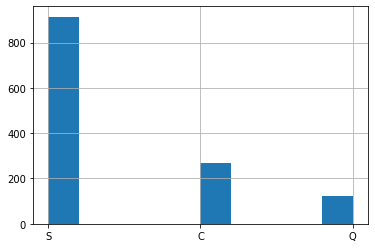

object


In [9]:
# To the columns Age and Fare I will put the median
# To the embarked I will put the one that has more frequency

# Age
df_merged['Age'].fillna(df_merged['Age'].median(), inplace=True)

# Fare
df_merged['Fare'].fillna(df_merged['Fare'].median(), inplace=True)

# Embarked
df_merged['Embarked'].hist()
plt.show()
print(df_merged['Embarked'].dtypes)
df_merged['Embarked'].fillna('S', inplace=True)

In [10]:
# See the null values again to check
print(df_merged.isnull().sum())
print(df_merged.shape)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
(1309, 7)


In [11]:
# Prepare the variables to the model

# The mathematical model works with numbers,so I need to transform the categorical variables to numerical

# Change the Sex column (male: 0, female: 1)
df_merged['Sex'] = df_merged['Sex'].map({'male': 0, 'female': 1})

# Change the Embarked column in 3 columns and put 0 or 1 to each column, applying the dummies variables
# Link to understand better this concept: https://www.youtube.com/watch?v=rAF1zzdgfRg
embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop(axis=1, columns='Embarked', inplace=True)

display(df_merged.head())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1


In [14]:
# Separating to dataset Train and dataset Test
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

In [15]:
# Building the machine learning model

# Analyse the data is the part that spend more time

# Importing the libraries of the Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Create a model of logistic regression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(train, target)

# Verifying the model accuracy
acc_logReg = round(lr_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))

Acurácia do modelo de Regressão Logística: 80.13


In [ ]:
# Predict in test
y_pred_lr = lr_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerid,
    "Survived": y_pred_lr
})

# generating csv file
submission.to_csv('./submission_lr.csv', index=False)

In [17]:
# Build another Machine Learning Model

# Create a model of decision tree
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(train, target)

# Verifying the accuracy of the model
acc_tree = round(tree_model.score(train, target) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))

Acurácia do modelo de Árvore de Decisão: 82.72


In [ ]:
y_pred_tree = tree_model.predict(test)

submission = pd.DataFrame({
    "PassengerId": passengerid,
    "Survived": y_pred_tree
})

# gerar arquivo csv
submission.to_csv('./submission_tree.csv', index=False)

In [33]:
personal_data = [[2, 0, 18.0, 0, 0, train['Fare'].mean(), 0, 1, 0]]

tree_model.predict(personal_data)[0]

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0